In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('NewspaperData.csv')

In [40]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [5]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


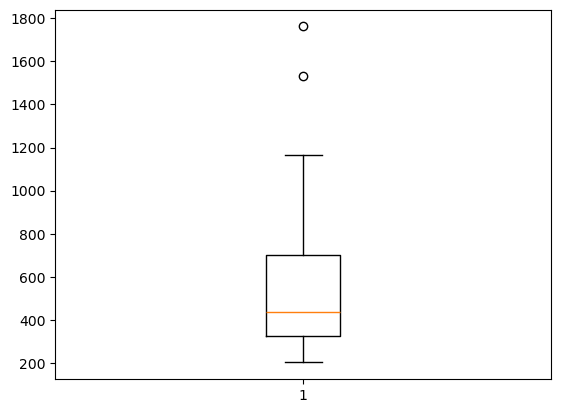

In [6]:
plt.boxplot(df['sunday'])
plt.show()

In [7]:
Q1 = np.percentile(df['sunday'],25)
Q1

327.7695

In [8]:
Q3 = np.percentile(df['sunday'],75)
Q3

699.73525

In [9]:
IQR = Q3-Q1
IQR

371.96574999999996

In [10]:
LW = Q3+1.5*IQR
LW

1257.683875

In [11]:
UW = Q1-1.5*IQR
UW

-230.179125

In [12]:
df['sunday'][df['sunday']>LW]

13    1531.527
18    1762.015
Name: sunday, dtype: float64

In [13]:
len(df['sunday'][df['sunday']>LW])

2

In [89]:
cleaned_data = df.drop([13,18] ,inplace = True)

In [91]:
df['sunday'] = cleaned_data

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LR = LinearRegression()

In [55]:
X = df['daily'].round(2)
Y = df['sunday'].round(2)

In [58]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = df['daily'].round(2).values.reshape(-1, 1)  # shape: (n_samples, 1)
Y = df['sunday'].round(2).values                # shape: (n_samples,)
LR = LinearRegression()
LR.fit(X, Y)
print("Intercept:", LR.intercept_)
print("Slope:", LR.coef_[0])

Intercept: 13.833506202488707
Slope: 1.3397192322732832


In [63]:
y_pred=LR.predict(X)
y_pred

array([ 538.93645929,  706.4415549 ,  490.27785678,  333.43692625,
        734.30771493,  996.89268446,  280.20988116,  352.27337866,
        290.0836119 ,  323.54979832,  616.38562811,  400.43628506,
        262.6729564 , 1573.78918307,  609.44588249,  566.96338563,
        378.61225877, 1061.22600199, 1633.84879625, 1119.78512964,
        313.59568442,  489.21947858,  704.48556482,  309.18800815,
        466.21649936,  277.91896127,  192.33769671,  514.90189627,
        380.70222077,  777.95576752,  538.0522446 ,  284.26923043,
        444.72740288, 1137.72397016])

In [77]:
from sklearn.metrics import mean_squared_error,r2_score

In [67]:
mse = mean_squared_error(y_pred,Y)
mse

11269.045895157984

[]

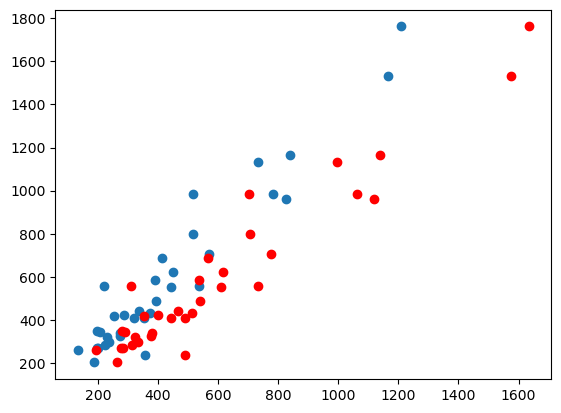

In [74]:
plt.scatter(X,Y)
plt.scatter(y_pred,Y,color='red')
plt.plot(color='black')

In [75]:
rmse =np.sqrt(mse)

In [76]:
rmse

106.15576242087843

In [78]:
r2score = r2_score(y_pred,Y)

In [79]:
r2score

0.9107438821414465

In [97]:
len(df['sunday'])

32

In [102]:
LR.predict([[516.981]])

array([706.44289462])